In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

In [ ]:
for token in doc:
    print(token.text,token.pos_,token.dep_)

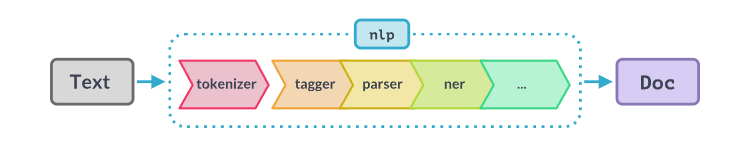

In [ ]:
nlp.pipeline

In [ ]:
doc2=nlp(u"Tesla isn't looking into startups anymore.")

In [ ]:
for token in doc2:
    print(token.text,token.pos_,token.dep_)

In [ ]:
doc2[0]

In [ ]:
doc2[0].pos_

In [ ]:
#Español
#!python -m spacy download es_core_news_sm
import spacy
nlp = spacy.load("es_core_news_sm")
import es_core_news_sm
nlp = es_core_news_sm.load()
doc = nlp("Esto es una frase.")
print([(w.text, w.pos_) for w in doc])

In [ ]:
doc_es = nlp(u"Tesla no está buscando más startups")

In [ ]:
for token in doc_es:
    print(token.shape_,token.text,token.pos_,token.dep_)

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [ ]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [ ]:
life_quote = doc3[16:30]
print(life_quote)

In [ ]:
type(life_quote)

In [ ]:
type(doc3)

<h2>Sentences</h2>

Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through Doc.sents. Later we'll write our own segmentation rules.

In [ ]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [ ]:
for sentence in doc4.sents:
    print(sentence)

In [ ]:
doc4[6]

In [ ]:
doc4[6].is_sent_start

In [ ]:
doc4[7].is_sent_start

<h1>Tokenization</h1>

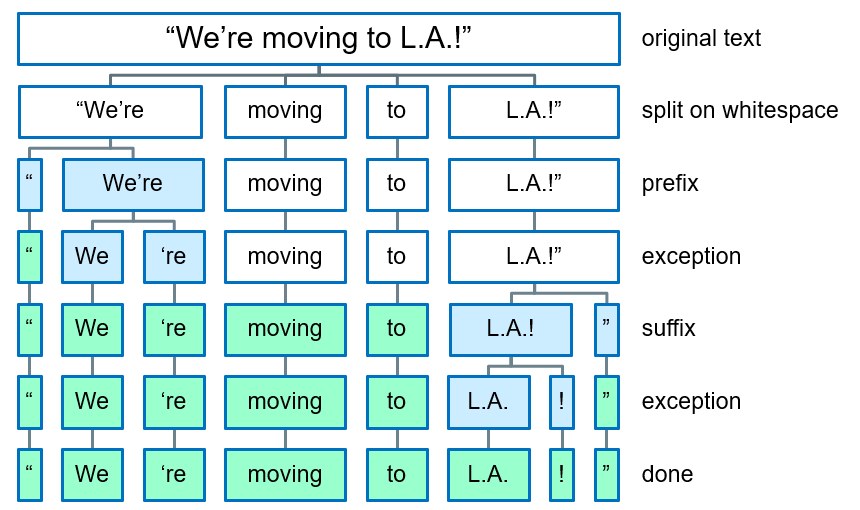

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
mystring = '"We\'re moving to L.A.!"'

In [ ]:
print(mystring)

In [ ]:
doc=nlp(mystring)

In [ ]:
for token in doc:
    print(token)

In [ ]:
doc2=nlp(u"We're here to help! Send snail-email, support@oursite.com or visit us at https://www.support.com!" )

In [ ]:
for token in doc2:
    print(token)

In [ ]:
doc3 = nlp(u"A 5km NYC cab costs $10.30")

In [ ]:
for token in doc3:
    print(token)

In [ ]:
doc4 = nlp(u"Let's visti St. Luis in the U.S next year.")

In [ ]:
for token in doc4:
    print(token)

In [ ]:
len(doc4)

In [ ]:
len(doc4.vocab)

In [ ]:
doc5 = nlp(u"It is better to give than receive")

In [ ]:
doc5[0]

In [ ]:
doc5[0]='test'#doesn't support assigment

<h2>Named Entities</h2>

Going a step beyond tokens, named entities add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the ents property of a Doc object.

In [ ]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

<h3>Noun Chunks</h3>
Similar to Doc.ents, Doc.noun_chunks are another object property. Noun chunks are "base noun phrases" – 
flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words 
describing the noun – for example, in Sheb Wooley's 1958 song, a "one-eyed, one-horned, flying, purple
people-eater" would be one long noun chunk.

In [ ]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

In [ ]:
from spacy import displacy

In [ ]:
doc = nlp(u"Apple is oging to build a U.K. factory for $6 million.")

In [ ]:
displacy.render(doc,style='dep',jupyter=True, options={'distance':80})

In [ ]:
doc=nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.")

In [ ]:
displacy.render(doc,style='ent',jupyter=True)

In [ ]:
doc=nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.")
displacy.serve(doc,style='ent')

<h1>Stemmer</h1>

In [1]:
import nltk
from nltk.stem.porter import PorterStemmer

In [2]:
p_stemmer = PorterStemmer()
words=['run','runner','ran','runs','easily','fairly','fairness']
for word in words:
    print(word+'---->'+ p_stemmer.stem(word))

run---->run
runner---->runner
ran---->ran
runs---->run
easily---->easili
fairly---->fairli
fairness---->fair


In [4]:
from nltk.stem.snowball import SnowballStemmer

In [5]:
s_stemmer = SnowballStemmer(language='english')
for word in words:
    print(word+'---->'+ p_stemmer.stem(word))

run---->run
runner---->runner
ran---->ran
runs---->run
easily---->easili
fairly---->fairli
fairness---->fair


In [6]:
words=['generous','generation','generously','generate']
for word in words:
    print(word+'---->'+ p_stemmer.stem(word))

generous---->gener
generation---->gener
generously---->gener
generate---->gener


<h1>Lemmatization</h1>

In [8]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [10]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [11]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I            PRON   4690420944186131903    I
am           AUX    10382539506755952630   be
meeting      VERB   6880656908171229526    meet
him          PRON   1655312771067108281    he
tomorrow     NOUN   3573583789758258062    tomorrow
at           ADP    11667289587015813222   at
the          DET    7425985699627899538    the
meeting      NOUN   14798207169164081740   meeting
.            PUNCT  12646065887601541794   .


<h1>Stopwords</h1>

In [17]:
nlp = spacy.load('en_core_web_sm')
print(nlp.Defaults.stop_words)

{'latterly', 'namely', 'done', 'never', 'on', 'off', 'otherwise', 'keep', 'name', 'them', 'be', 'made', 'next', 'yet', 'but', 'seemed', '’m', 'when', 'ever', 'in', 'whereas', 'except', 'once', 'hence', 'somewhere', '’ll', 'everywhere', 'she', 'if', 'make', 'sixty', 'rather', 'we', 'your', 'whereupon', 'also', 'some', 'nevertheless', 'full', 'due', 'third', 'towards', 'sometimes', '’s', 'those', 'herself', 'as', 'anyway', 'among', 'moreover', 'why', 'themselves', 'can', 'take', 'you', 'everyone', 'becomes', 'the', 'again', 'thereby', 'however', 'meanwhile', 'bottom', 'amongst', 'did', 'around', 'serious', 'becoming', 'both', 'there', 'these', 'still', 'herein', 'thereupon', 'until', 'more', "'d", 'neither', 'twelve', 'and', 'for', 'a', 'with', 'could', 'do', 'ourselves', 'will', 'mostly', "'m", 'n’t', 'two', 'one', 'sometime', 'without', 'another', 'from', 'others', 'wherein', 'against', '‘ll', 'further', 'hereupon', 'after', 'what', 'least', 'it', 'hundred', 'somehow', 'five', 'at', 'r

In [18]:
len(nlp.Defaults.stop_words)

326

In [20]:
nlp.vocab['is'].is_stop

True

In [21]:
nlp.vocab['mystery'].is_stop

False

In [24]:
#Add a particular word
nlp.Defaults.stop_words.add('btw')
nlp.vocab['btw'].is_stop= True

In [25]:
len(nlp.Defaults.stop_words)

327

In [26]:
nlp.vocab['btw'].is_stop

True

In [31]:
#Remove a word
nlp.vocab['indeed'].is_stop

True

In [34]:
#nlp.Defaults.stop_words.remove('indeed')
nlp.vocab['indeed'].is_stop= False

In [35]:
nlp.vocab['indeed'].is_stop

False

<h1>Phrase Matching</h1>

In [37]:
import spacy

This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>

In [38]:
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [53]:
patterns = [
[{'LOWER': 'solarpower'}], [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}],
[{'LOWER': 'solarpowered'}],[{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]
]


## Other token attributes
Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

In [58]:
#matcher.add('SolarPower',None,pattern1,pattern2,pattern3)#none=callback
# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', patterns)

In [59]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [60]:
found_matches=matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


In [61]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


In [62]:
matcher.remove('SolarPower')

In [63]:
patterns = [
[{'LOWER': 'solarpower'}], [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}],
[{'LOWER': 'solarpowered'}],[{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]
]

In [64]:
# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', patterns)
doc = nlp(u'The Solar--Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [65]:
found_matches=matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 4), (8656102463236116519, 11, 12), (8656102463236116519, 14, 17)]


In [66]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 4 Solar--Power
8656102463236116519 SolarPower 11 12 solarpower
8656102463236116519 SolarPower 14 17 Solar-power


In [70]:
with open('UPDATED_NLP_COURSE/TextFiles/reaganomics.txt') as f:
    doc3 = nlp(f.read())

In [78]:
# First, create a list of match phrases:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

# Next, convert each phrase to a Doc object:
phrase_patterns = [[nlp(text)] for text in phrase_list]

phrase_patterns

[[voodoo economics],
 [supply-side economics],
 [trickle-down economics],
 [free-market economics]]

In [80]:
# # Pass each Doc object into matcher (note the use of the asterisk!):
# matcher.add('VoodooEconomics', phrase_patterns)

# # Build a list of matches:
# matches = matcher(doc3)